In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
train_df = pd.read_csv("../input/siim-isic-melanoma-classification/train.csv")

In [5]:
train_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB


In [7]:
train_df.describe()

,age_approx,target
count,33058.000000,33126.000000
mean,48.870016,0.017630
std,14.380360,0.131603
min,0.000000,0.000000
25%,40.000000,0.000000
50%,50.000000,0.000000
75%,60.000000,0.000000
max,90.000000,1.000000


### Column Descriptions
(provided in competition/data description)


* `image_name` - unique identifier, points to filename of related DICOM image
* `patient_id` - unique patient identifier
* `sex` - the sex of the patient (when unknown, will be blank)
* `age_approx` - approximate patient age at time of imaging
* `anatom_site_general_challenge` - location of imaged site
* `diagnosis` - detailed diagnosis information **(train only)**
* `benign_malignant` - indicator of malignancy of imaged lesion
* `target` - binarized version of the target variable

**Missing Values Exploration**

<AxesSubplot:>

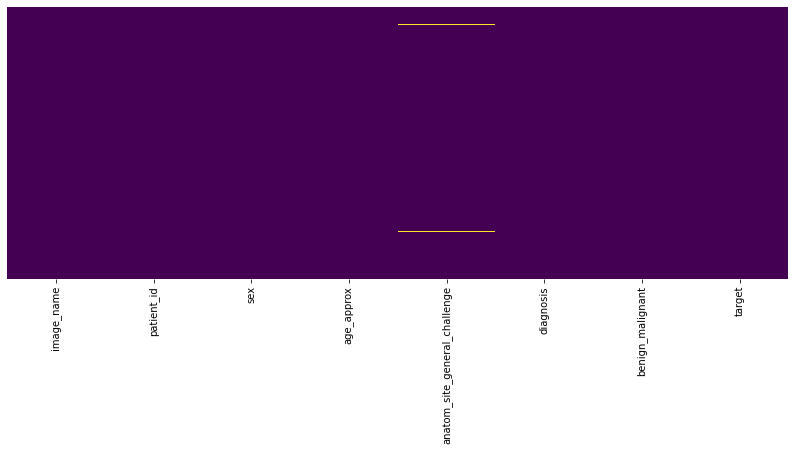

In [8]:
plt.figure(figsize=(14,5))
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [9]:
sex_missing = train_df[train_df['sex'].isnull() == True].shape[0]
anatom_missing = train_df[train_df['anatom_site_general_challenge'].isnull() == True].shape[0]
age_missing = train_df[train_df['age_approx'].isnull() == True].shape[0]

print("Column missing counts")
print(f"-- anatom_site_general_challenge: {anatom_missing}")
print(f"-- sex: {sex_missing}")
print(f"-- age_approx: {age_missing}")

Column missing counts
-- anatom_site_general_challenge: 527
-- sex: 65
-- age_approx: 68


**Feature Unique Values**

In [10]:
# actually no instances where "sex" == nan
# strange that it's part of the list above

train_df["anatom_site_general_challenge"].unique().tolist()

['head/neck',
 'upper extremity',
 'lower extremity',
 'torso',
 nan,
 'palms/soles',
 'oral/genital']

In [11]:
train_df["diagnosis"].unique().tolist()

['unknown',
 'nevus',
 'melanoma',
 'seborrheic keratosis',
 'lentigo NOS',
 'lichenoid keratosis',
 'solar lentigo',
 'cafe-au-lait macule',
 'atypical melanocytic proliferation']

In [12]:
train_df["sex"].unique().tolist()

['male', 'female', nan]

#### Plotting

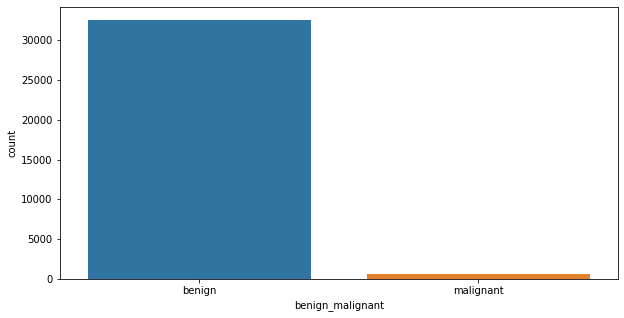

In [13]:
# percentage malignant

plt.figure(figsize=(10,5))

sns.countplot(x="benign_malignant" ,data=train_df)
plt.show()

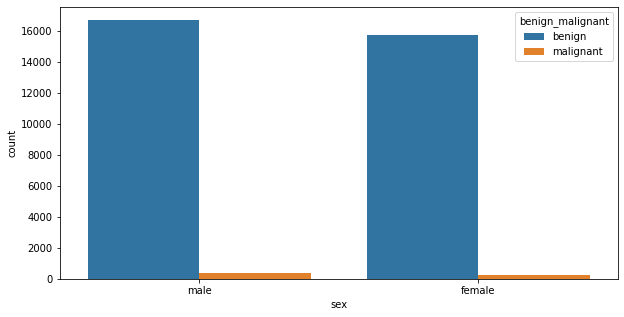

In [14]:
plt.figure(figsize=(10,5))

sns.countplot(x="sex" ,data=train_df, hue="benign_malignant")
plt.show()

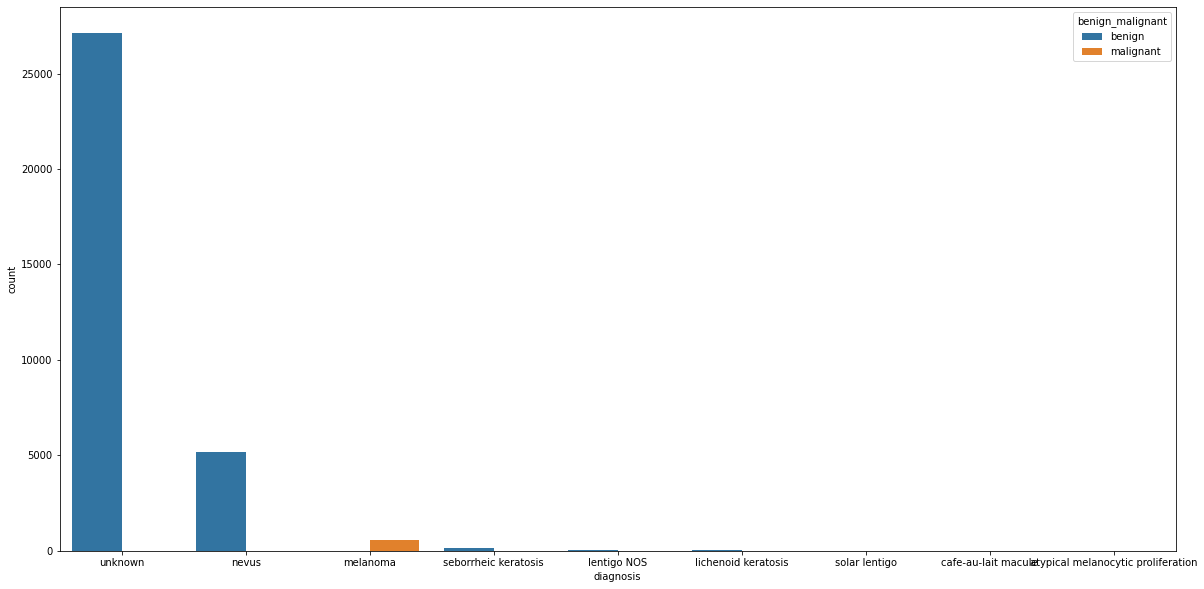

In [15]:
plt.figure(figsize=(20,10))

sns.countplot(x="diagnosis" ,data=train_df, hue="benign_malignant")
plt.show()

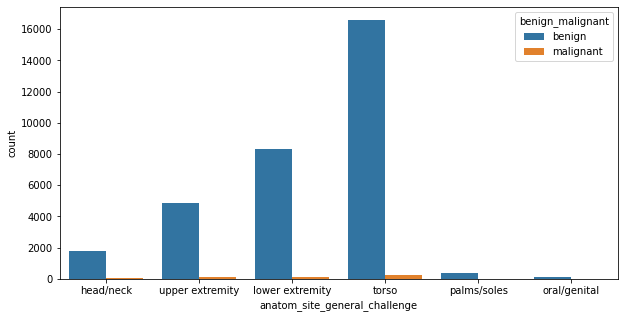

In [16]:
plt.figure(figsize=(10,5))

sns.countplot(x="anatom_site_general_challenge" ,data=train_df, hue="benign_malignant")
plt.show()

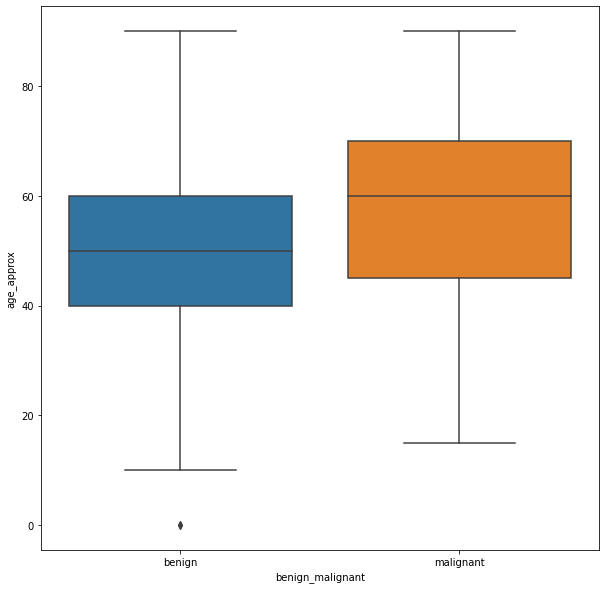

In [17]:
plt.figure(figsize=(10,10))

sns.boxplot(x="benign_malignant", y="age_approx" ,data=train_df)#, hue="benign_malignant")
plt.show()

## Test Data

In [18]:
test_df = pd.read_csv("../input/siim-isic-melanoma-classification/test.csv")

In [19]:
test_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,NaN
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity


In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10982 entries, 0 to 10981
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     10982 non-null  object 
 1   patient_id                     10982 non-null  object 
 2   sex                            10982 non-null  object 
 3   age_approx                     10982 non-null  float64
 4   anatom_site_general_challenge  10631 non-null  object 
dtypes: float64(1), object(4)
memory usage: 429.1+ KB


In [21]:
missing = test_df[test_df["anatom_site_general_challenge"].isnull() == True].shape[0]

print(f"There are {missing} missing values in the anatom_site_general_challenge column for the test dataset")

There are 351 missing values in the anatom_site_general_challenge column for the test dataset


# Plotting Images

In [22]:
import matplotlib.image as img

In [26]:
train_df.sample(10)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
21738,ISIC_6584629,IP_0347699,male,20.0,lower extremity,unknown,benign,0
28276,ISIC_8560031,IP_9639732,male,35.0,lower extremity,unknown,benign,0
19964,ISIC_6064843,IP_0776416,female,30.0,lower extremity,unknown,benign,0
4875,ISIC_1566381,IP_5474292,male,35.0,upper extremity,unknown,benign,0
22317,ISIC_6763221,IP_8829018,male,55.0,lower extremity,unknown,benign,0
12380,ISIC_3809612,IP_5208504,female,45.0,lower extremity,unknown,benign,0
18080,ISIC_5509212,IP_0646610,male,45.0,lower extremity,unknown,benign,0
21098,ISIC_6405981,IP_5857448,male,35.0,lower extremity,unknown,benign,0
27474,ISIC_8319058,IP_5916797,female,60.0,upper extremity,unknown,benign,0
6468,ISIC_2031360,IP_5621584,female,40.0,lower extremity,unknown,benign,0


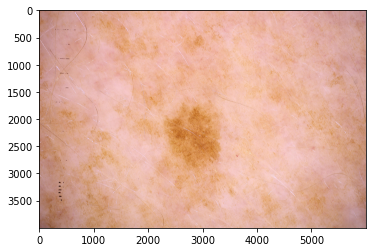

In [27]:

image_name = "ISIC_0074268.jpg"
path = os.path.join("../input/siim-isic-melanoma-classification/jpeg/train", image_name)

image = img.imread(path)

plt.imshow(image)

In [83]:
### Helper function

import math

def image_grid_plotter(list_of_image_paths):
    number_of_elements = len(list_of_image_paths)
    num_columns = math.floor(np.sqrt(number_of_elements))
    num_rows = math.ceil(number_of_elements/num_columns)
    
    for i in range(number_of_elements):
        IMAGE = img.imread(list_of_image_paths[i])
        
        index = i + 1
    
        plt.subplot(num_rows, num_columns, index)
        plt.imshow(IMAGE)
    
    plt.show()

In [56]:
### Helper function

def image_names_to_paths(parent_path, image_names):
    image_paths = []
#     parent_path = "../input/siim-isic-melanoma-classification/jpeg/train"
    for image_name in image_names:
        image_name = image_name + ".jpg"
        full_path = os.path.join(parent_path, image_name)
        image_paths.append(full_path)
    
    return image_paths

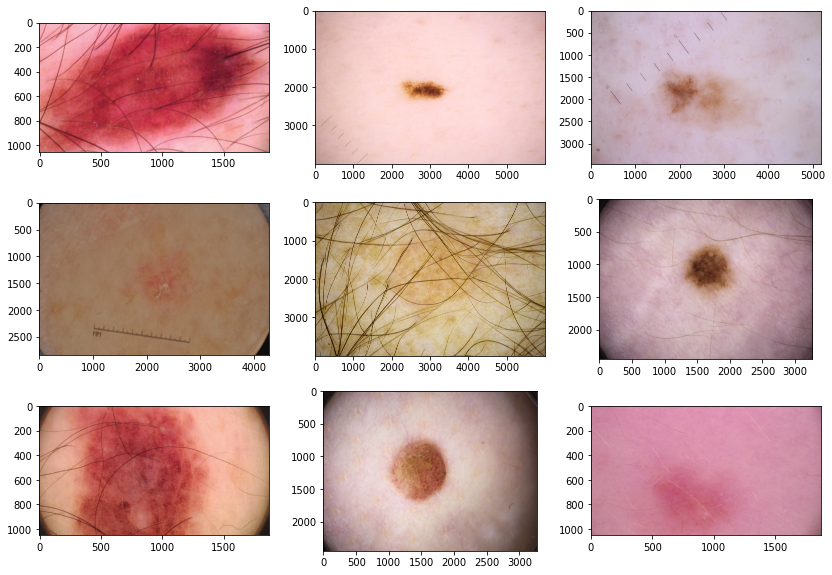

In [84]:
### Random Sample of Images

# image_names = ["ISIC_0074268.jpg", "ISIC_0074542.jpg", "ISIC_0077472.jpg", "ISIC_0085172.jpg"]
image_names = train_df["image_name"].sample(9).tolist()

image_paths = image_names_to_paths("../input/siim-isic-melanoma-classification/jpeg/train", image_names)


plt.figure(figsize=(14, 10))
image_grid_plotter(image_paths)

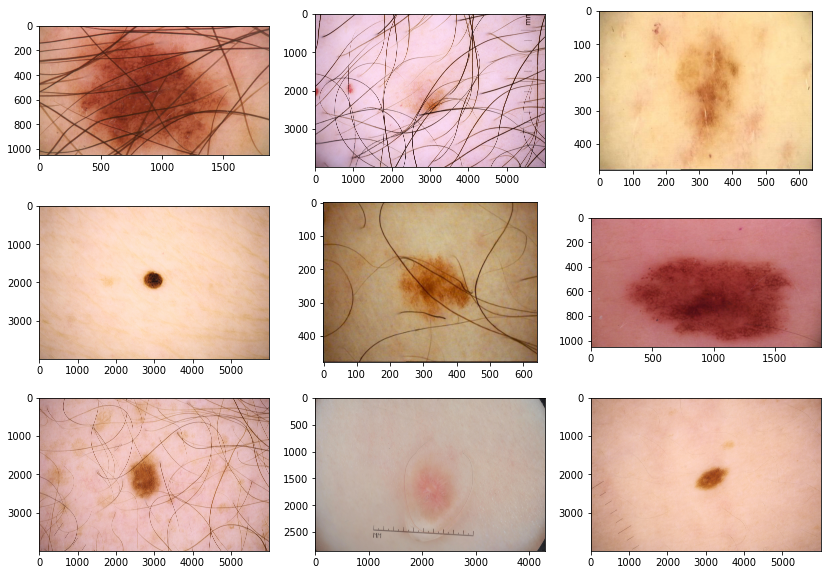

In [85]:
### Random Sample of Benign Images

image_names = train_df[train_df["benign_malignant"] == "benign"]["image_name"].sample(9).tolist()

image_paths = image_names_to_paths("../input/siim-isic-melanoma-classification/jpeg/train", image_names)

plt.figure(figsize=(14, 10))
image_grid_plotter(image_paths)

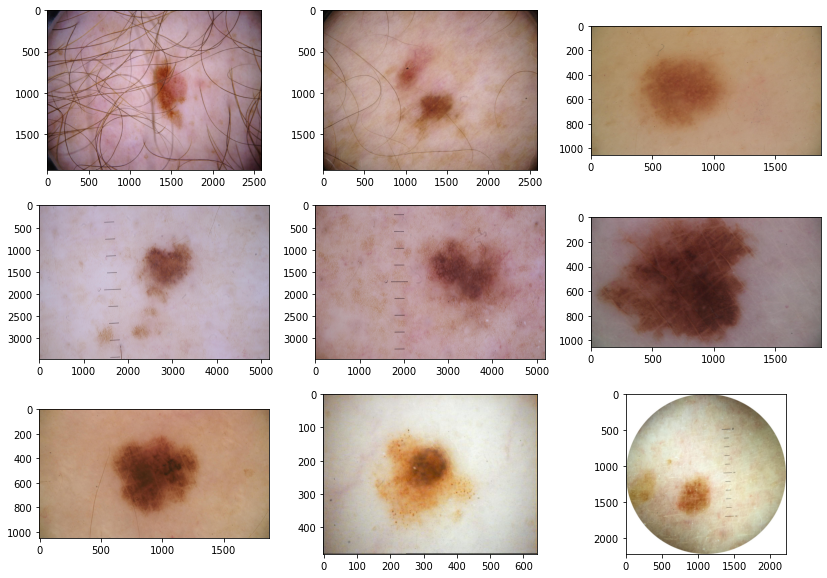

In [86]:
### Random Sample of Malignant Images

image_names = train_df[train_df["benign_malignant"] == "malignant"]["image_name"].sample(9).tolist()

image_paths = image_names_to_paths("../input/siim-isic-melanoma-classification/jpeg/train", image_names)

plt.figure(figsize=(14, 10))
image_grid_plotter(image_paths)

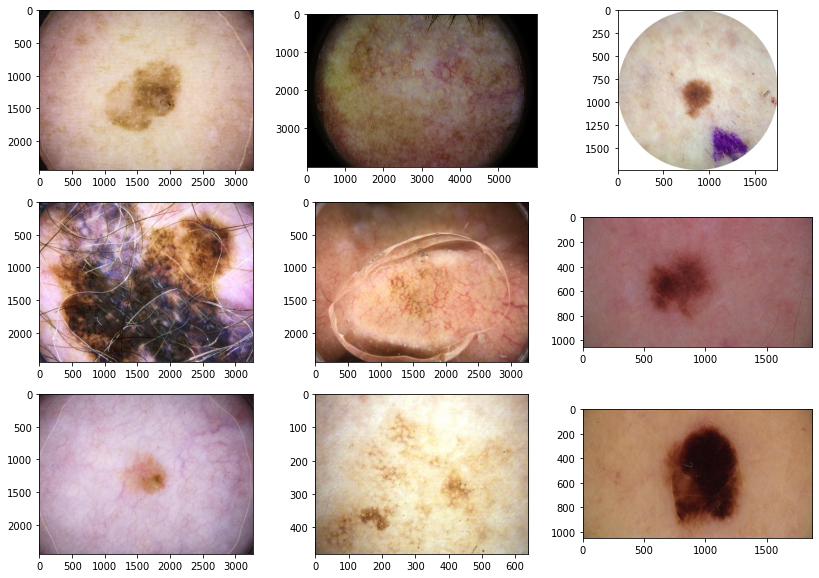

In [87]:
### Random Sample where diagnosis = melanoma

image_names = train_df[train_df["diagnosis"] == "melanoma"]["image_name"].sample(9).tolist()

image_paths = image_names_to_paths("../input/siim-isic-melanoma-classification/jpeg/train", image_names)

plt.figure(figsize=(14, 10))
image_grid_plotter(image_paths)